In [7]:
#import libarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("raw_data_superstore_sales.csv",encoding='iso-8859-1') #reading the csv file

In [9]:
pd.set_option('display.max_columns',30)#costomizing the max display column

In [10]:
#formatting the dataframe to our needs
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["month"]=df["Order Date"].dt.strftime("%B")
df["month_in_num"]=df["Order Date"].dt.strftime("%m")

In [11]:
#expoting the dataframe for futher use
df.to_csv("superstore_sales.csv",index=False)

In [12]:
#grouping the data according to the month and total sales at that month
df_monthly_sales=df.groupby(["month_in_num","month"])["Sales"].sum().to_frame().reset_index().set_index("month")

In [13]:
#putting all the month in a list called "month_list" for xlabel format
month_list=list(df_monthly_sales.index)

Text(0.5, 1.0, 'Sales per month')

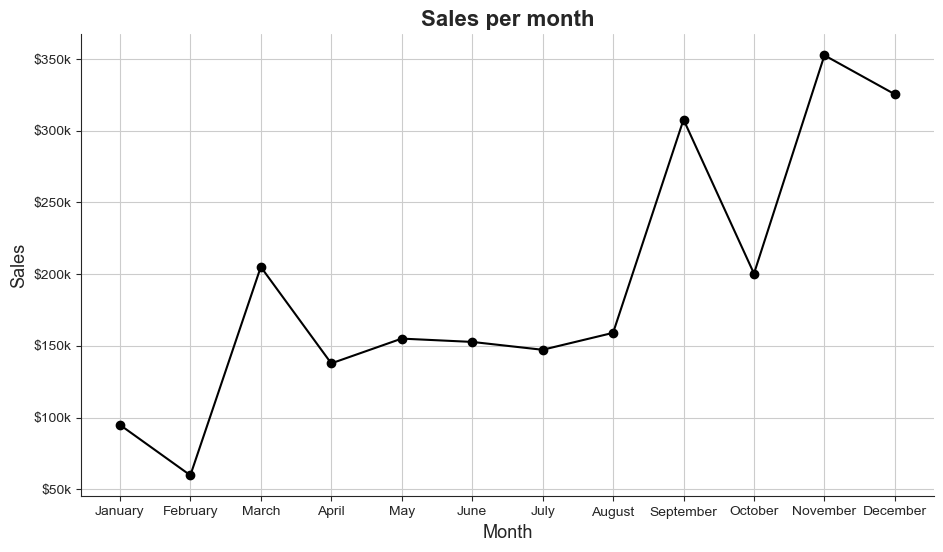

In [14]:
#setting the style for the graph
sns.set_style("ticks")

#ploting the graph using matplotlib
df_monthly_sales.plot(kind="line",figsize=[11,6],marker="o",color="k")

#Remove the top and right spines from plot
sns.despine()

#making the grid visible
plt.grid()

#getting the axis of the plot
ax=plt.gca()

#formating the xticks to show all the month 
plt.xticks(range(len(month_list)))
ax.set_xticklabels(month_list)

#formating the xticks to make it more readable
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f"${int(y/1000)}k"))

#removing the legend
plt.legend().set_visible(False)

#giving the axis label and graph title
plt.xlabel("Month",fontsize=13)
plt.ylabel("Sales",fontsize=13)
plt.title("Sales per month",fontsize=16,weight="bold")


